IMPORTING LIBRARIES


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

LOADIND DATASET

In [ ]:
df=pd.read_csv('advertising_sales_data.csv')
df = df.fillna(0)

 Calculate the average amount spent on TV advertising


In [ ]:
average_tv_spend = df['TV'].mean()

In [ ]:
print(f'Average amount spent on TV advertising: {average_tv_spend:.2f}')



Average amount spent on TV advertising: 147.04


 Calculate the correlation between Radio advertising expenditure and Sales

In [ ]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])

print(f'Correlation between radio advertising expenditure and product sales: {correlation_radio_sales:.2f}')

Correlation between radio advertising expenditure and product sales: 0.34


by corelation analysis we can identify

In [ ]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation_matrix)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.049539   0.056648  0.901208
Radio      0.049539  1.000000   0.359913  0.344075
Newspaper  0.056648  0.359913   1.000000  0.157960
Sales      0.901208  0.344075   0.157960  1.000000


In [ ]:
correlation_tv = df['TV'].corr(df['Sales'])
correlation_radio = df['Radio'].corr(df['Sales'])
correlation_newspaper = df['Newspaper'].corr(df['Sales'])

print(f'Correlation between TV and Sales: {correlation_tv:.3f}')
print(f'Correlation between Radio and Sales: {correlation_radio:.3f}')
print(f'Correlation between Newspaper and Sales: {correlation_newspaper:.3f}')

Correlation between TV and Sales: 0.901
Correlation between Radio and Sales: 0.344
Correlation between Newspaper and Sales: 0.158


TV advertising has the strongest relationship with sales, followed by radio and then newspaper. This suggests that increasing investment in TV advertising is likely to have the most significant positive effect on sales.

without normalization

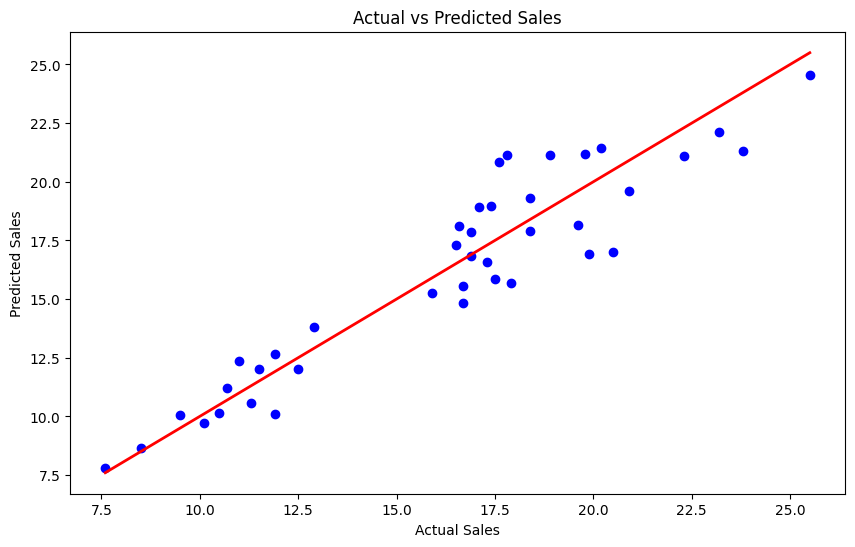

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the independent variables and the dependent variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an instance of the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set
y_pred = regressor.predict(X_test)

# Plot the model's predictions against the actual sales values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of best fit
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
# New advertising expenditures
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [50]
})

# Predict sales using the trained model
predicted_sales = regressor.predict(new_data)

# Display the predicted sales
print(f"Predicted Sales for the new advertising expenditures: ${predicted_sales[0]:.2f}")

Predicted Sales for the new advertising expenditures: $19.73


NORMALIZATION


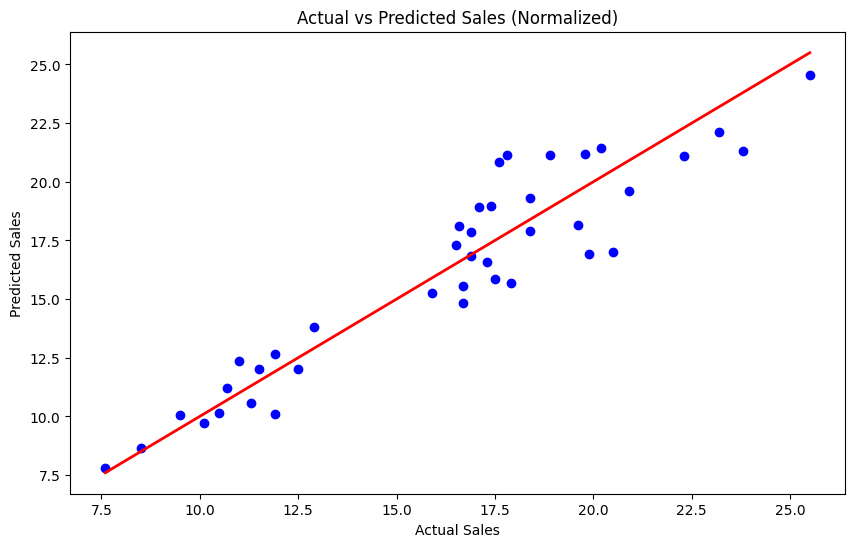

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)  # Normalized training features
X_test_norm = scaler.transform(X_test)         # Normalized test features

# Create an instance of the model
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)

# Predict the test set
y_pred_norm = model_norm.predict(X_test_norm)

# Plot the model's predictions against the actual sales values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_norm, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of best fit
plt.title('Actual vs Predicted Sales (Normalized)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

only radio and newspaper

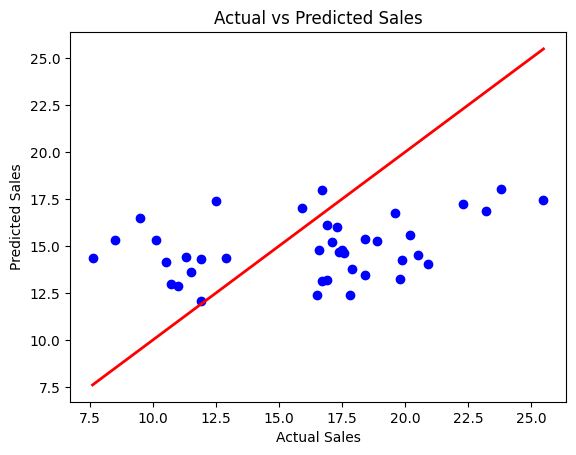

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the independent variables and the dependent variable
Xnew = df[[ 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(Xnew, y, test_size=0.2, random_state=1)

# Create an instance of the model
regressor = LinearRegression()
regressor.fit(X_trainnew, y_trainnew)

# Predict the test set
y_prednew = regressor.predict(X_testnew)

# Plot the model's predictions against the actual sales values
plt.scatter(y_testnew, y_prednew, color='blue')
plt.plot([min(y_testnew), max(y_testnew)], [min(y_testnew), max(y_testnew)], color='red', linewidth=2)  # Line of best fit
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()